In [1]:
from sklearn.datasets import make_regression, make_classification

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, f1_score, recall_score, precision_score

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split

from itertools import combinations

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

%matplotlib inline

In [2]:
def score_regression(X_train, X_test, y_train, y_test, features, model):
    """
    Calculate the metrics for a linear regression.
    
    Parameters
    ----------
    X_train : DataFrame or array 
        Training split of features
    
    X_train : DataFrame or array
        Testing split of features
    
    y_train : DataFrame or array
        Training split of target
    
    x_train : DataFrame or array
        Testing split of target
    
    features : list
        The list of features to use for the regression
        
    model : regression model
        A regression model with a .score method
        
        
    Returns
    -------
    train,test : dictionaries containing the scores
    """
    
    
    # create predictions
    preds_train = model.predict(X_train[features])
       
    preds_test = model.predict(X_test[features])
   
    # train scoring
    train_scores = {'set':'train'}
    train_scores['r2']=(model.score(X_train[features],y_train))
    train_scores['rmse']=(mean_squared_error(y_train, preds_train, squared=False))
    train_scores['mae']=(mean_absolute_error(y_train, preds_train))
    train_scores['features'] = features
    
    # test scoring
    test_scores = {'set':'test'}
    test_scores['r2']=(model.score(X_test[features],y_test))
    test_scores['rmse']=(mean_squared_error(y_test, preds_test, squared=False))
    test_scores['mae']=(mean_absolute_error(y_test, preds_test))
    test_scores['features'] = features
      
    return train_scores, test_scores

In [3]:
def plot_scores(scores_df):
    """
    Plot the scores from the regression
    
    Parameters
    ----------
    
    scores : DataFrame
        DataFrame containing the scores to plot
        
    Returns
    -------
    
    A set of figures showing the R^2, RMSE, and MAE for the test and train split        
    """

    fig,ax = plt.subplots(2,2, figsize=(12,12))

    ax[0,0].set_title('$R^2$ Score')
    ax[0,0].tick_params('x',labelrotation=-45)

    ax[0,1].set_title('Root Mean Squared Error')
    ax[0,1].tick_params('x',labelrotation=-45)

    ax[1,0].set_title('Mean Absolute Error')
    ax[1,0].tick_params('x',labelrotation=-45)
    
    sns.barplot

    sns.barplot(x='set_number',y='r2',hue='set',data=scores_df, ax=ax[0,0])
    sns.barplot(x='set_number',y='rmse',hue='set',data=scores_df, ax=ax[0,1])
    sns.barplot(x='set_number',y='mae',hue='set',data=scores_df, ax=ax[1,0])

    ax[1,1].remove();
    
    return None

In [4]:
def plot_residuals(X_train, X_test, y_train, y_test, features, model):
    """
    Plot the residuals 
    Parameters
    ----------
    X_train : DataFrame or array 
        Training split of features
    
    X_train : DataFrame or array
        Testing split of features
    
    y_train : DataFrame or array
        Training split of target
    
    x_train : DataFrame or array
        Testing split of target
    
    features : list
        The list of features to use for the regression
        
    model : regression model
        A regression model with a .score method
        
    Returns
    -------
    QQ Plot and scatter plot of residuals
    """
    
    preds_train = model.predict(X_train[features])
    resids_train = y_train - preds_train
    
    preds_test = model.predict(X_test[features])
    resids_test = y_test - preds_test
    
    
    fig, axes = plt.subplots(2,2, figsize=(15,15))

    fig.suptitle(f'Plots for features {features}', fontsize=18)
    
    axes[0,0].set_title('QQ Test Plot')
    sm.qqplot(resids_test, line = '45',marker = '.', ax=axes[0,0])
    
    axes[0,1].set_title('Test Heteroskedasticity')
    axes[0,1].set_xlabel('Residuals')
    axes[0,1].set_ylabel('Target')
    sns.scatterplot(x=resids_test, y = y_test, ax=axes[0,1])
        
    axes[1,0].set_title('QQ Train Plot')
    sm.qqplot(resids_train, line='45',ax=axes[1,0])
    
    axes[1,1].set_title('Train Heteroskedasticity')
    axes[1,1].set_xlabel('Residuals')
    axes[1,1].set_ylabel('Target')
    sns.scatterplot(x=resids_train, y = y_train, ax=axes[1,1]);

In [5]:
# Make Regression
X,y = make_regression(n_samples=20000, n_features=5, n_informative=3, noise=.5, random_state=42)

col_name = [ 'x' + str(x) for x in range(X.shape[1])]

lr_df = pd.DataFrame(X, columns = col_name)

lr_df['target'] = y

In [7]:
# Split

X = lr_df.drop(columns='target')
y = lr_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [8]:
# Create list of all combinations of features

comb = [list(combinations(list(lr_df.drop(columns='target').columns),x)) for x in range( 1, len(lr_df.columns)) ]

In [9]:
# convert sets to list

feature_list = []

for i in comb:
    for j in i:
        feature_list.append(list(j))

In [10]:
# Create the dataframe

lr_scores_df = pd.DataFrame(columns = ['set','r2','rmse','mae', 'features', 'set_number'])
sgd_scores_df = pd.DataFrame(columns = ['set','r2','rmse','mae', 'features', 'set_number'])
knn_scores_df = pd.DataFrame(columns = ['set','r2','rmse','mae', 'features', 'set_number'])

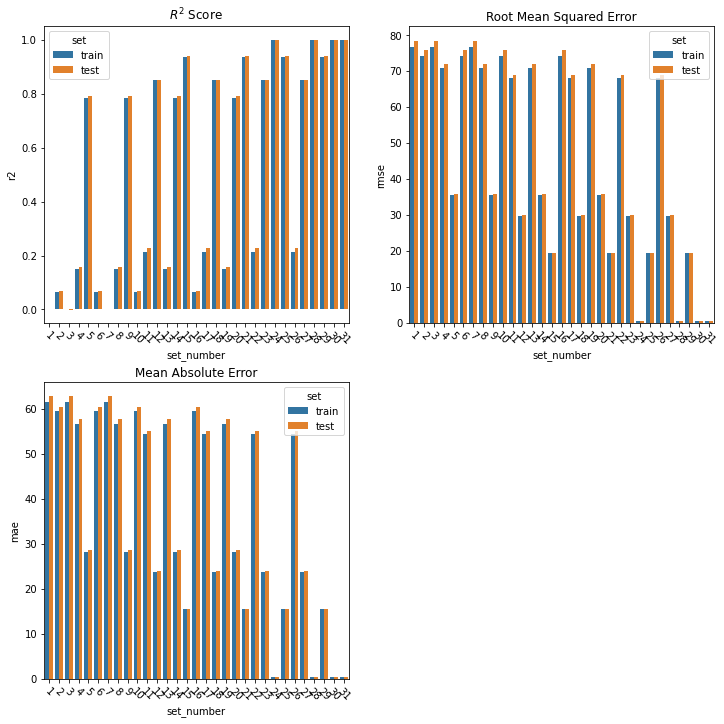

In [11]:
# Instantiate a linear regression model

lr = LinearRegression()

# Step through all the combinations and score

for i, features in enumerate(feature_list):
    
    lr.fit(X_train[features], y_train)
     
    train, test = score_regression(X_train, X_test, y_train, y_test, features,lr)
        
    train['set_number']=(i+1)
    test['set_number']=(i+1)
    
    lr_scores_df = lr_scores_df.append(train, ignore_index=True)
    lr_scores_df = lr_scores_df.append(test, ignore_index=True)
    
plot_scores(lr_scores_df)

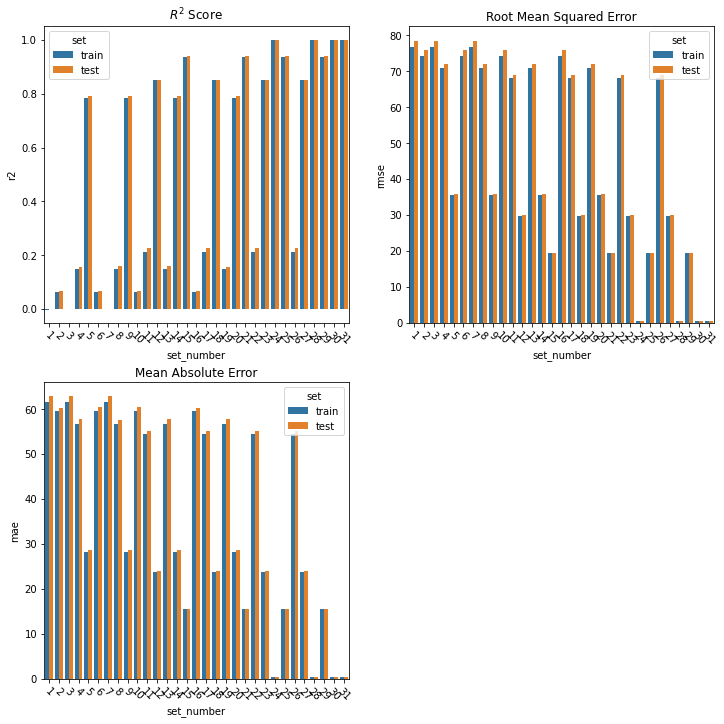

In [12]:
# Instantiate an SGD model

sgd = SGDRegressor()

# Step through all the combinations and score

for i, features in enumerate(feature_list):
    
    sgd.fit(X_train[features], y_train)
     
    train, test = score_regression(X_train, X_test, y_train, y_test, features,sgd)
        
    train['set_number']=(i+1)
    test['set_number']=(i+1)
    
    sgd_scores_df = sgd_scores_df.append(train, ignore_index=True)
    sgd_scores_df = sgd_scores_df.append(test, ignore_index=True)
    
plot_scores(sgd_scores_df)

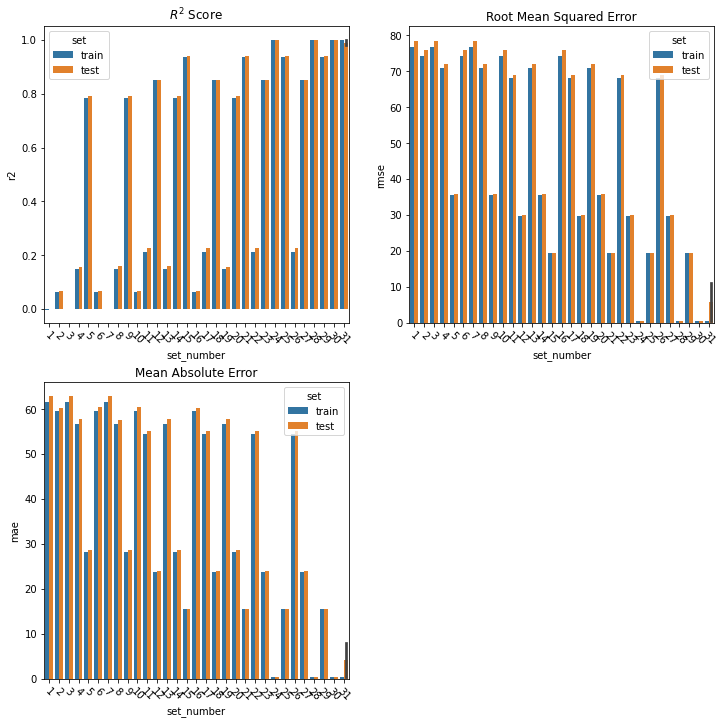

In [13]:
# Instantiate a kNN model

knn = KNeighborsRegressor()

# Step through all the combinations and score

for i, features in enumerate(feature_list):
    
    knn.fit(X_train[features], y_train)
     
    train, test = score_regression(X_train, X_test, y_train, y_test, features,knn)
        
    train['set_number']=(i+1)
    test['set_number']=(i+1)
    
    knn_scores_df = sgd_scores_df.append(train, ignore_index=True)
    knn_scores_df = sgd_scores_df.append(test, ignore_index=True)
    
plot_scores(knn_scores_df)

In [14]:
# Get highest R^2

highest_lr_r2 = lr_scores_df[lr_scores_df['set'] == 'test'].sort_values('r2', ascending=False).head(5).copy()
highest_sgd_r2 = sgd_scores_df[sgd_scores_df['set'] == 'test'].sort_values('r2', ascending=False).head(5).copy()
highest_knn_r2 = knn_scores_df[knn_scores_df['set'] == 'test'].sort_values('r2', ascending=False).head(5).copy()

In [15]:
# show differences

print(highest_lr_r2)
print(highest_sgd_r2)
print(highest_knn_r2)

     set        r2       rmse        mae              features set_number
55  test  0.999959   0.500594   0.400911      [x0, x1, x3, x4]         28
61  test  0.999959   0.500608   0.400921  [x0, x1, x2, x3, x4]         31
47  test  0.999959   0.500622   0.400951          [x1, x3, x4]         24
59  test  0.999959   0.500636   0.400960      [x1, x2, x3, x4]         30
41  test  0.938839  19.410322  15.544681          [x0, x3, x4]         21
     set        r2       rmse        mae              features set_number
61  test  0.999959   0.500711   0.401140  [x0, x1, x2, x3, x4]         31
47  test  0.999959   0.500861   0.401076          [x1, x3, x4]         24
55  test  0.999959   0.500865   0.401047      [x0, x1, x3, x4]         28
59  test  0.999959   0.501138   0.401131      [x1, x2, x3, x4]         30
57  test  0.938869  19.405567  15.539874      [x0, x2, x3, x4]         29
     set        r2       rmse       mae              features set_number
61  test  0.999959   0.500711  0.401140

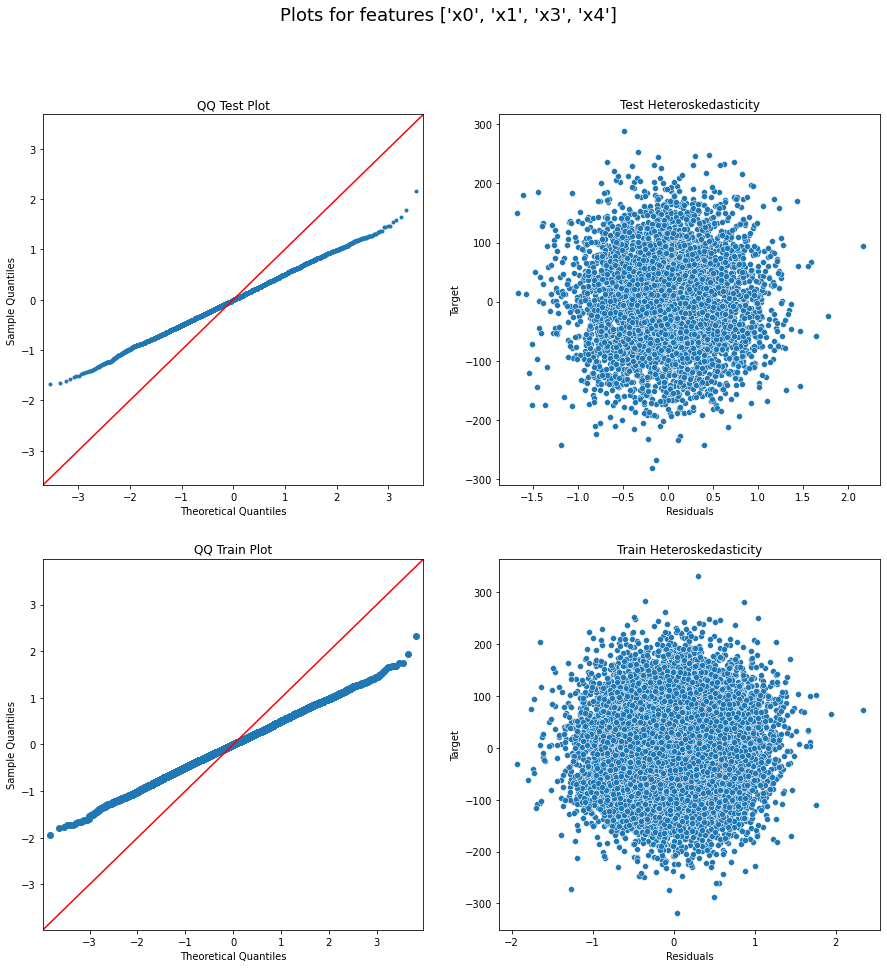

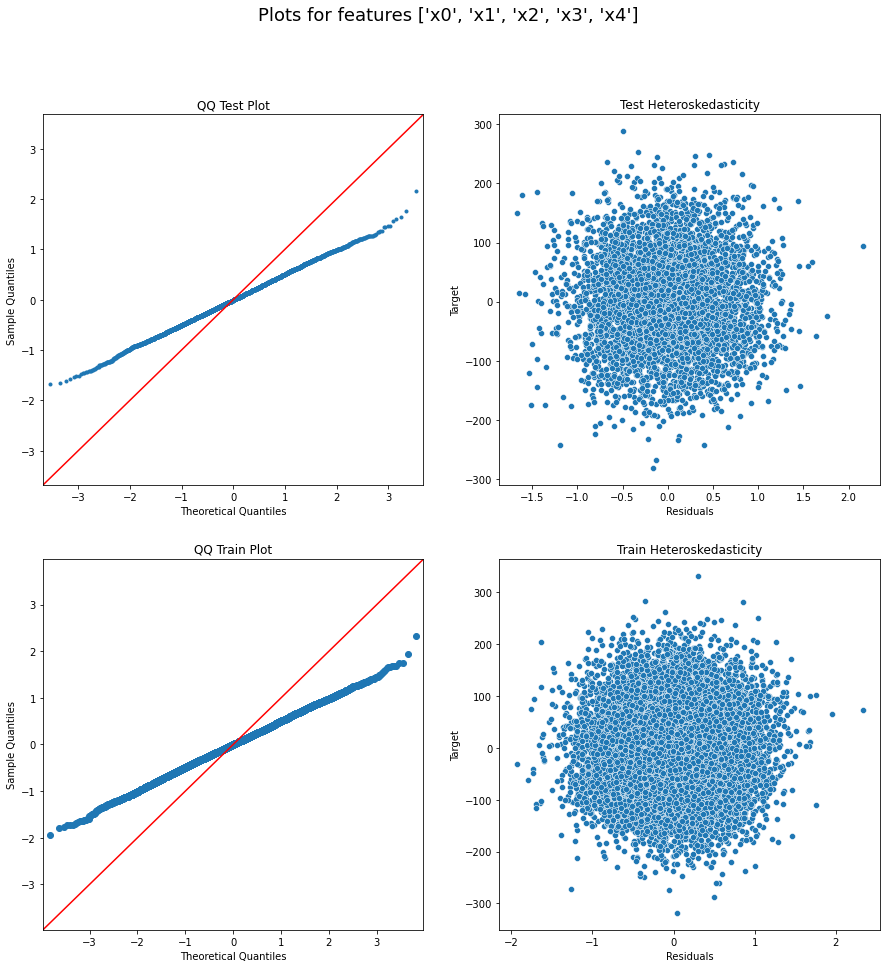

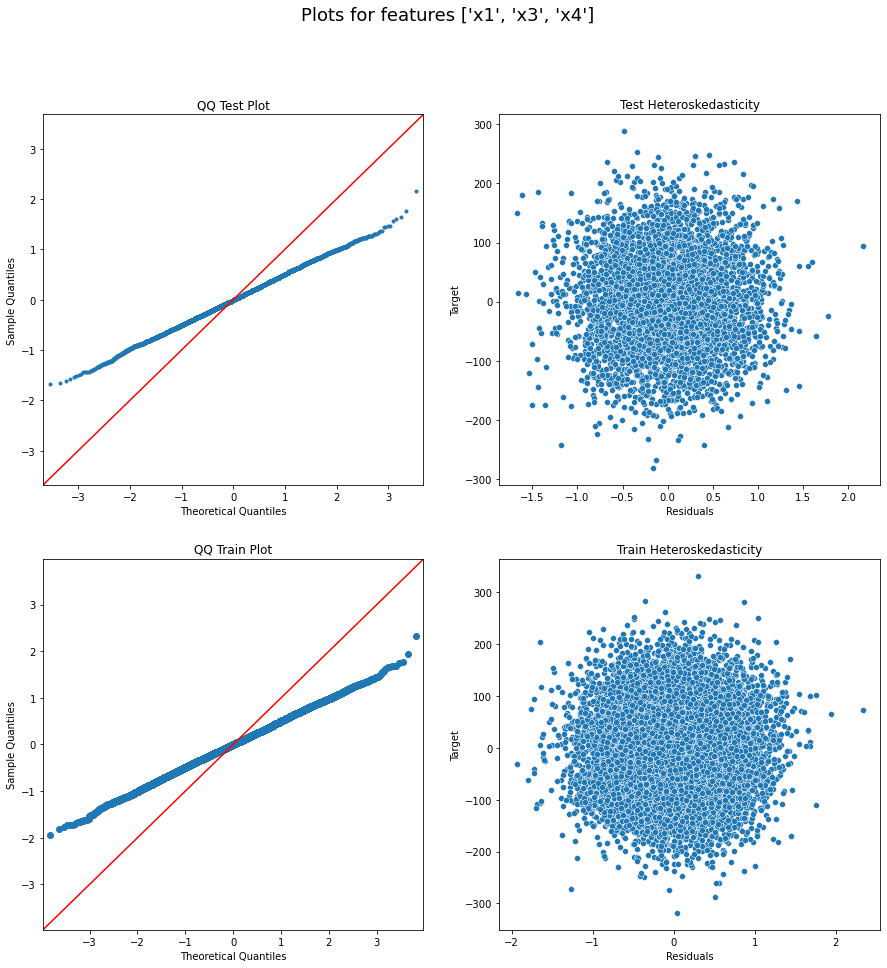

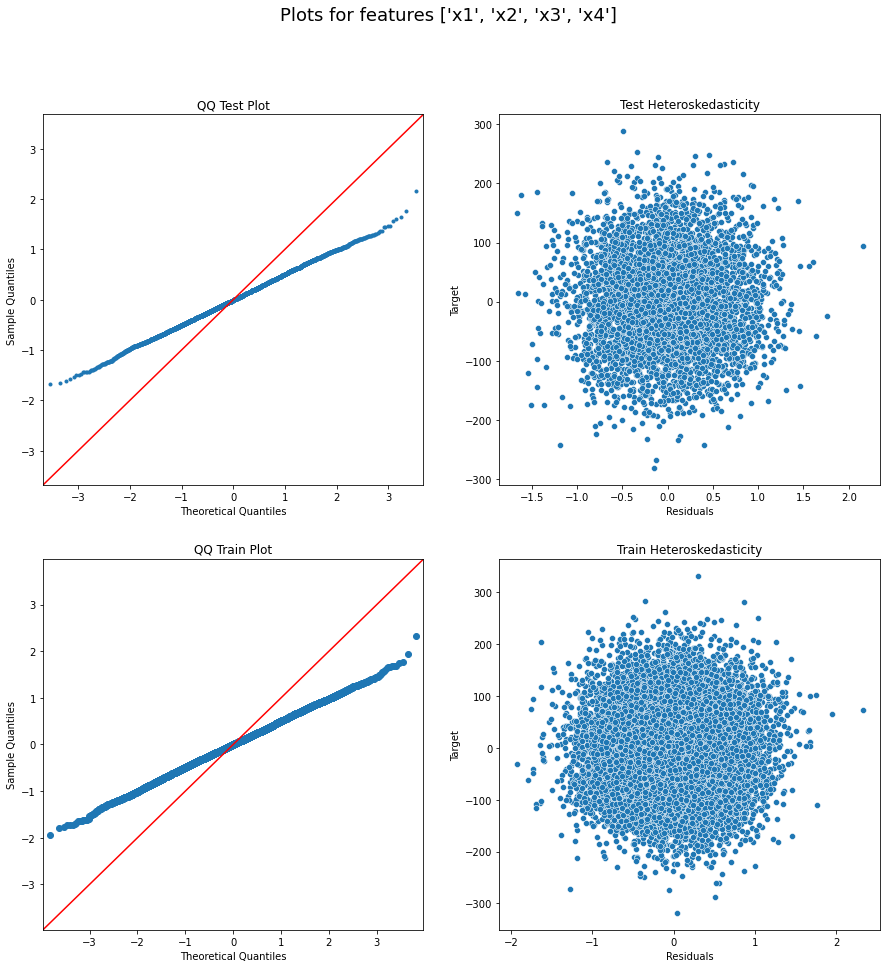

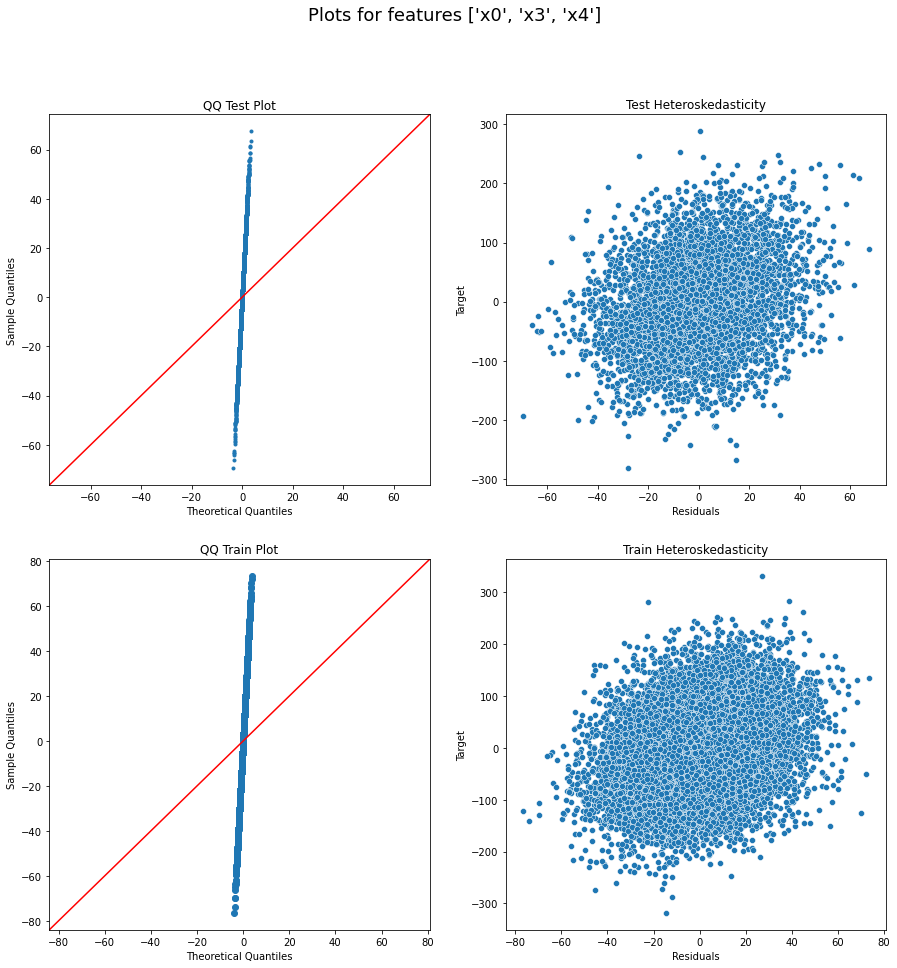

In [16]:
# Step through the features

feature_list = list(highest_lr_r2.loc[:,'features'])

for features in feature_list:
    
    lr.fit(X_train[features], y_train)
   
    plot_residuals(X_train, X_test, y_train, y_test, features, lr)
    


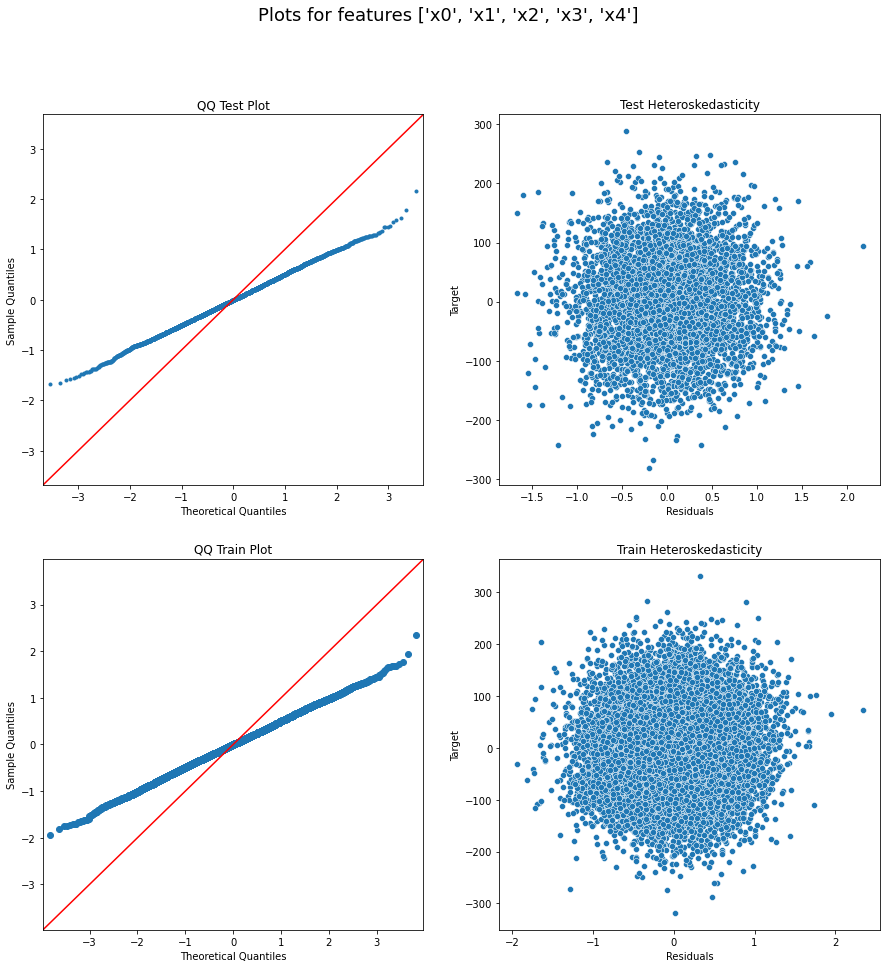

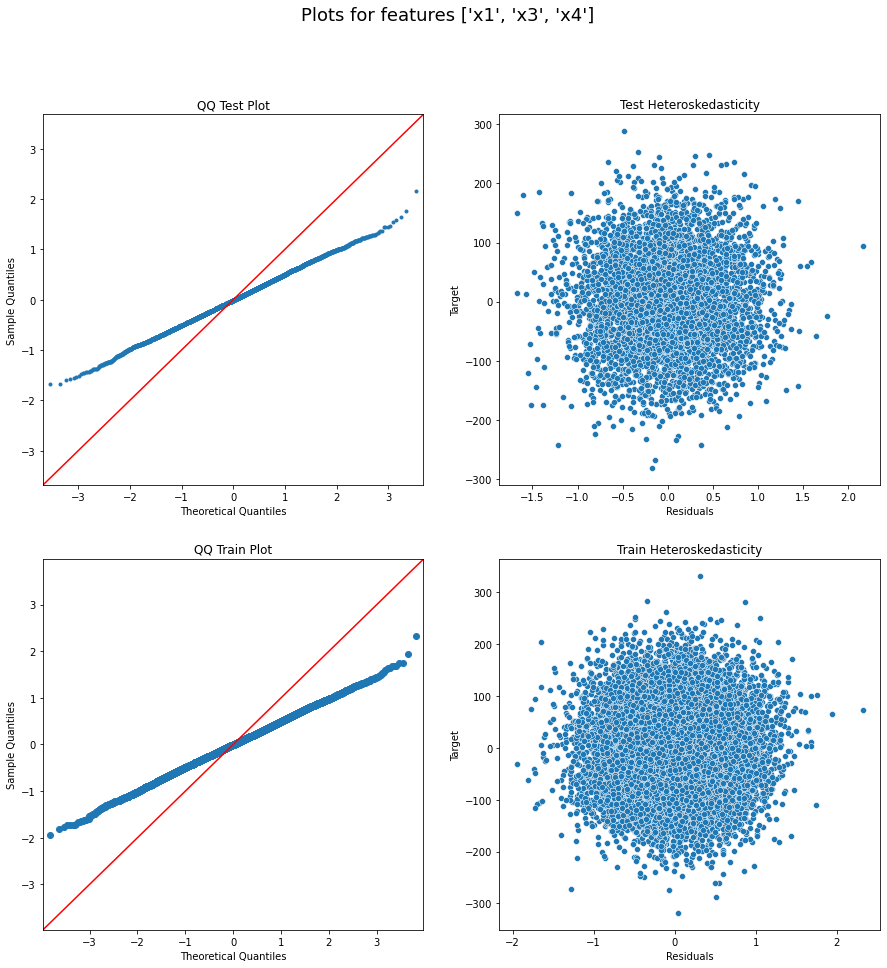

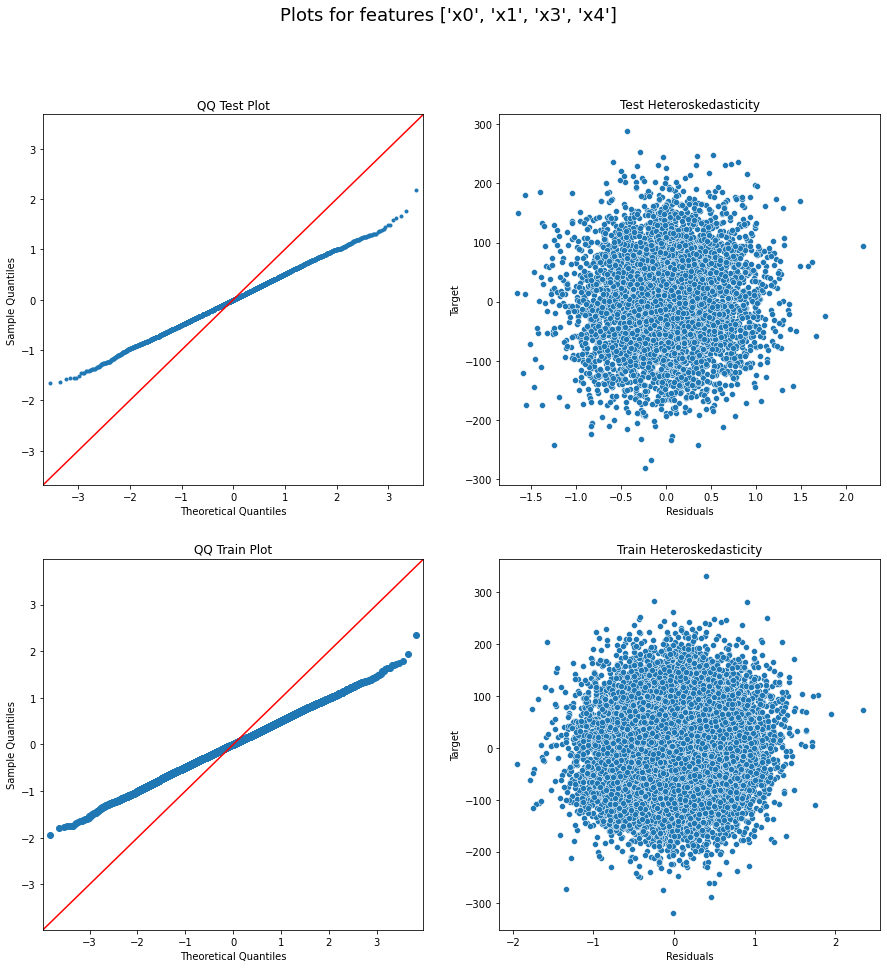

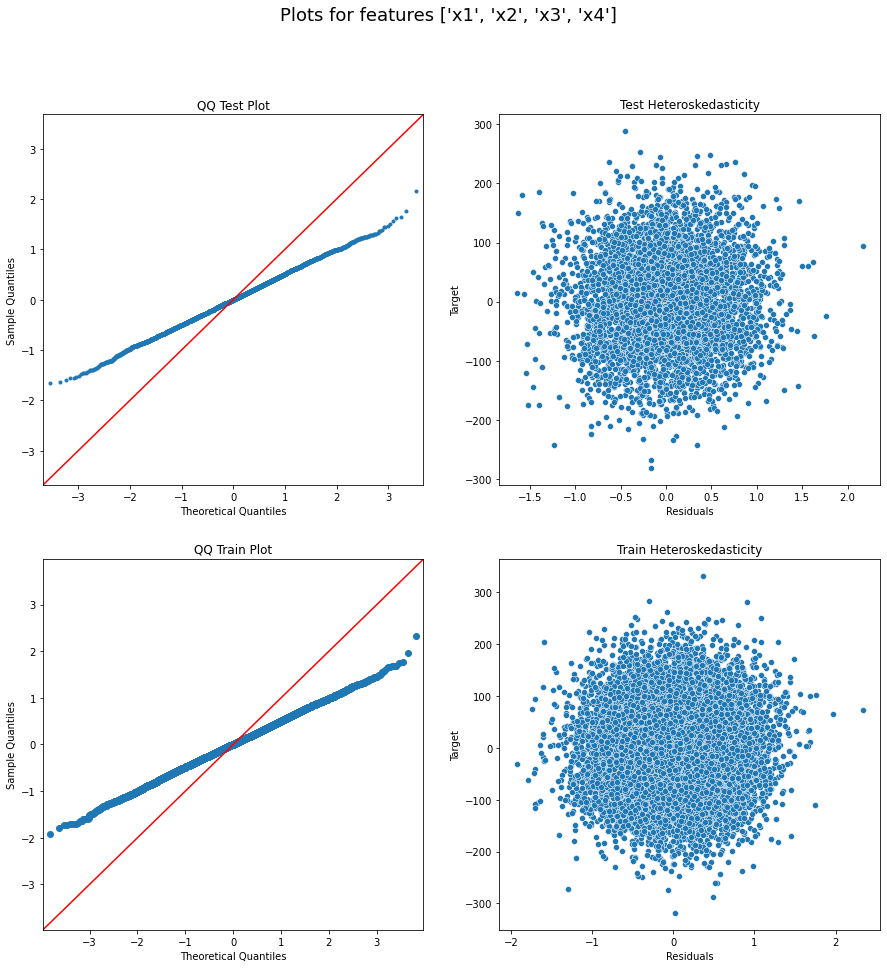

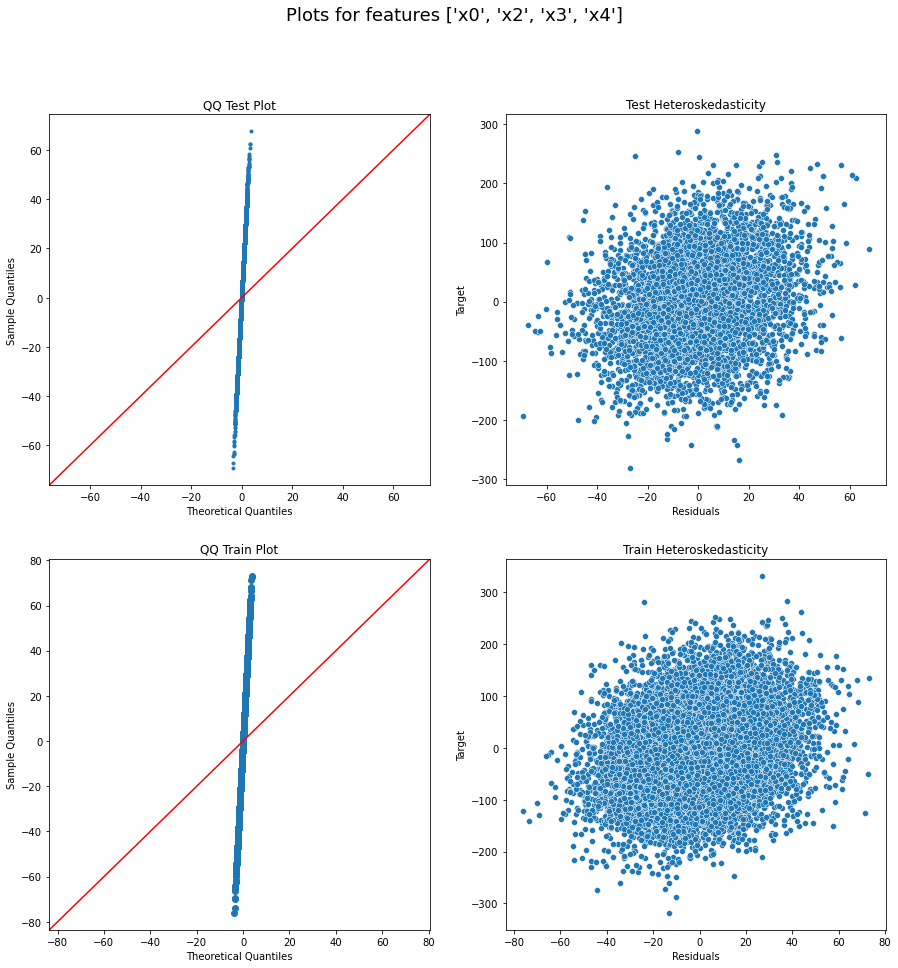

In [17]:
# Step through the features

feature_list = list(highest_sgd_r2.loc[:,'features'])

for features in feature_list:
    
    sgd.fit(X_train[features], y_train)
   
    plot_residuals(X_train, X_test, y_train, y_test, features, sgd)

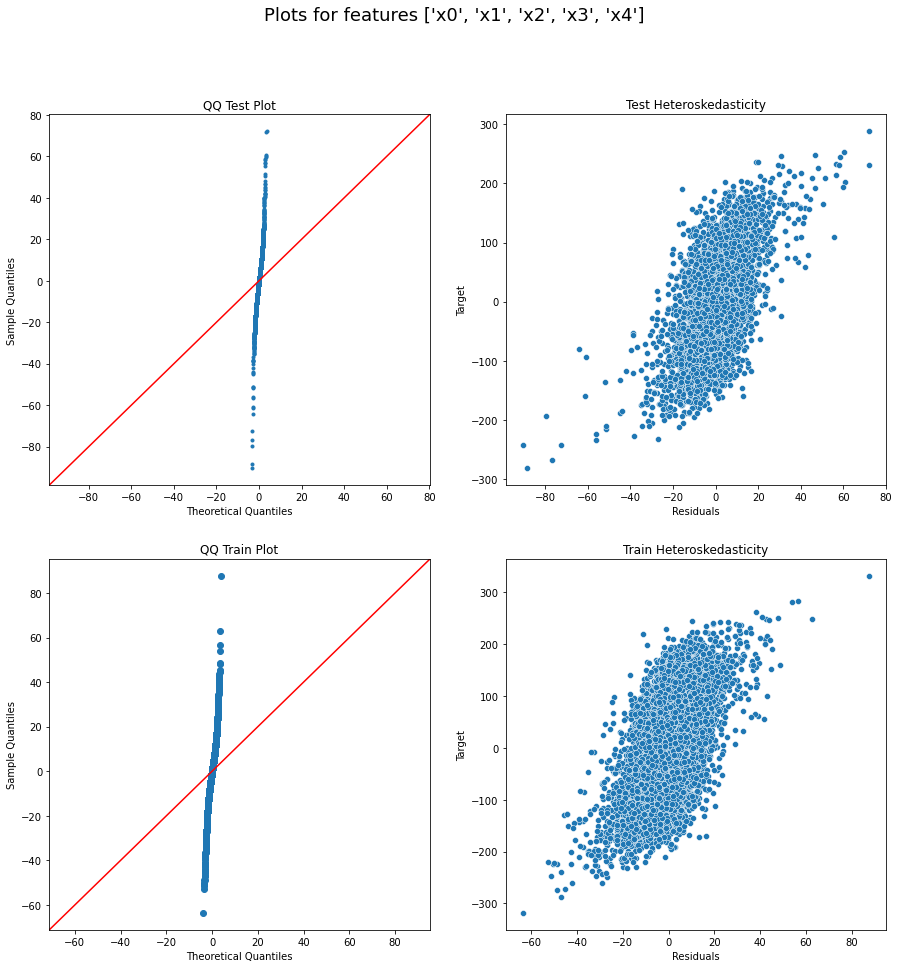

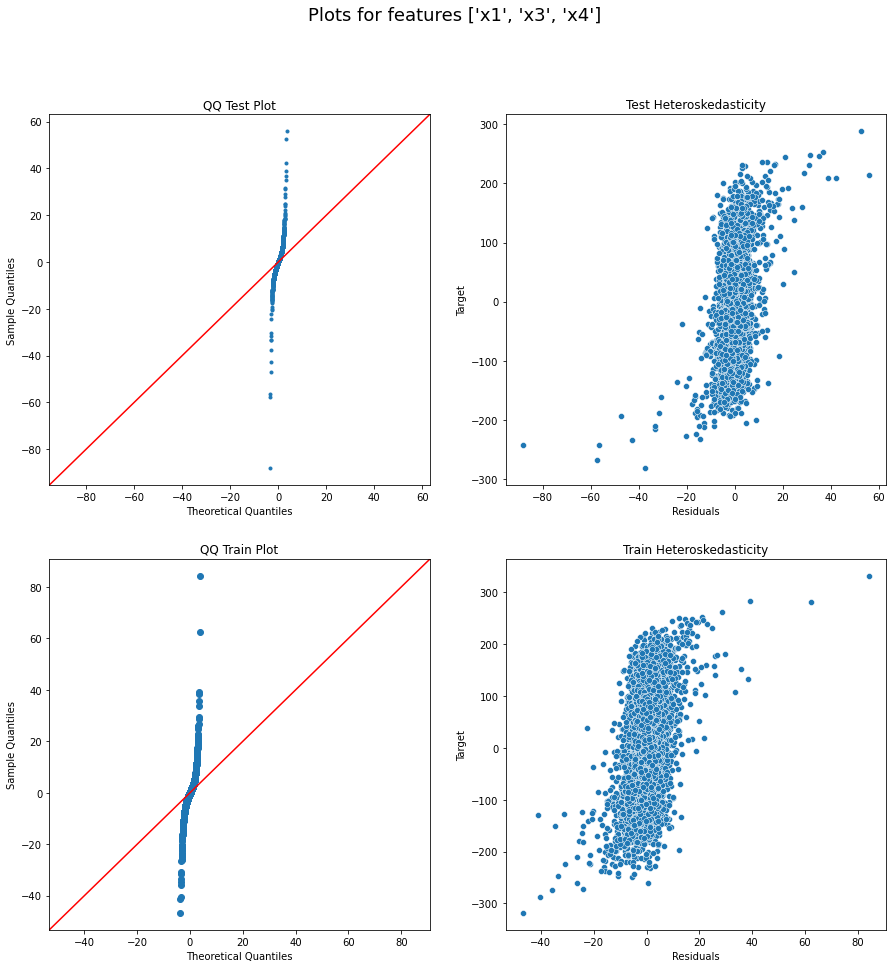

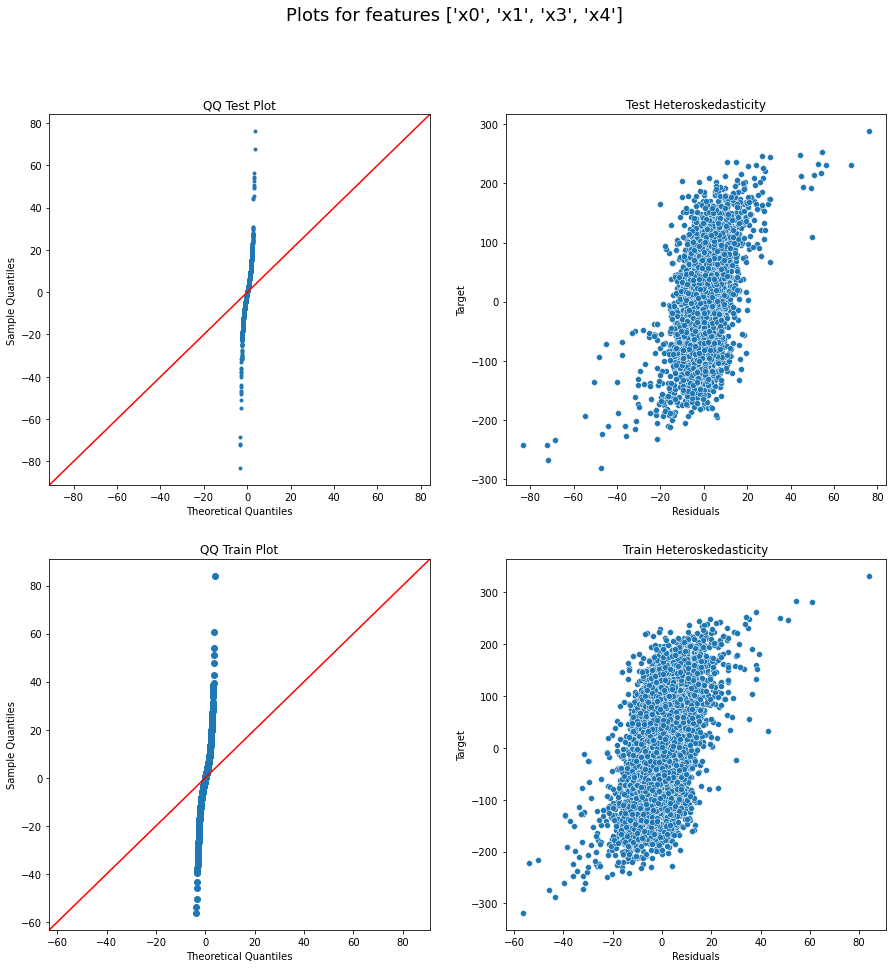

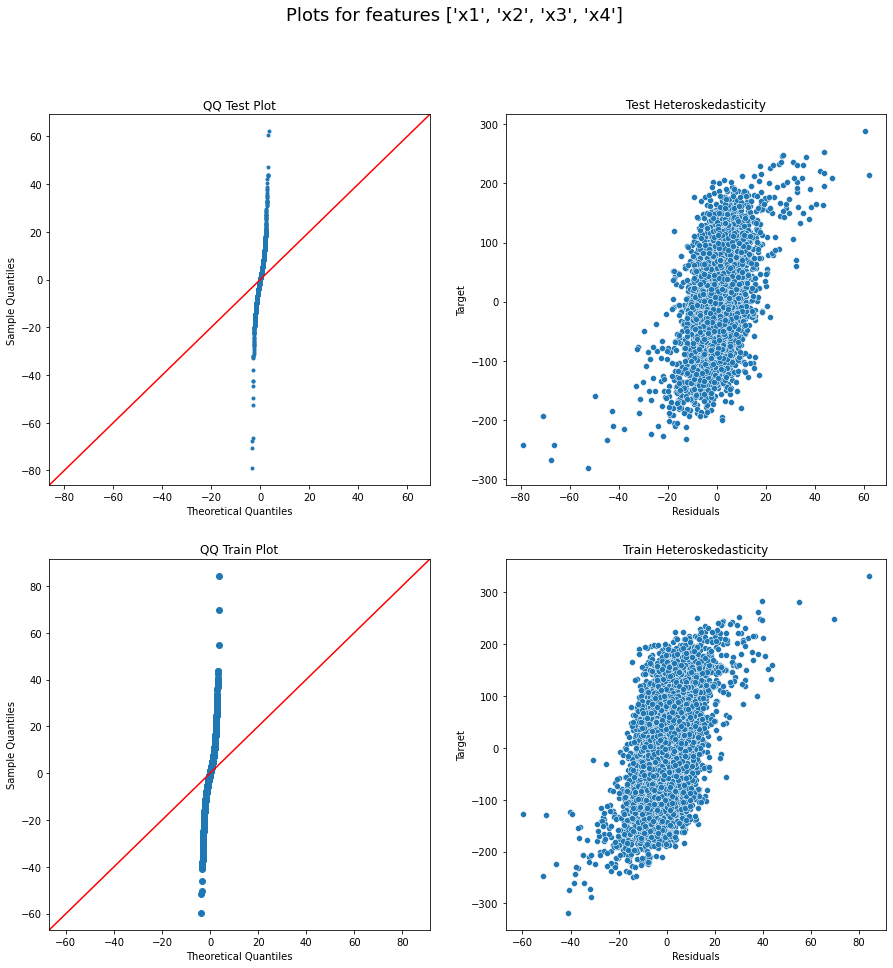

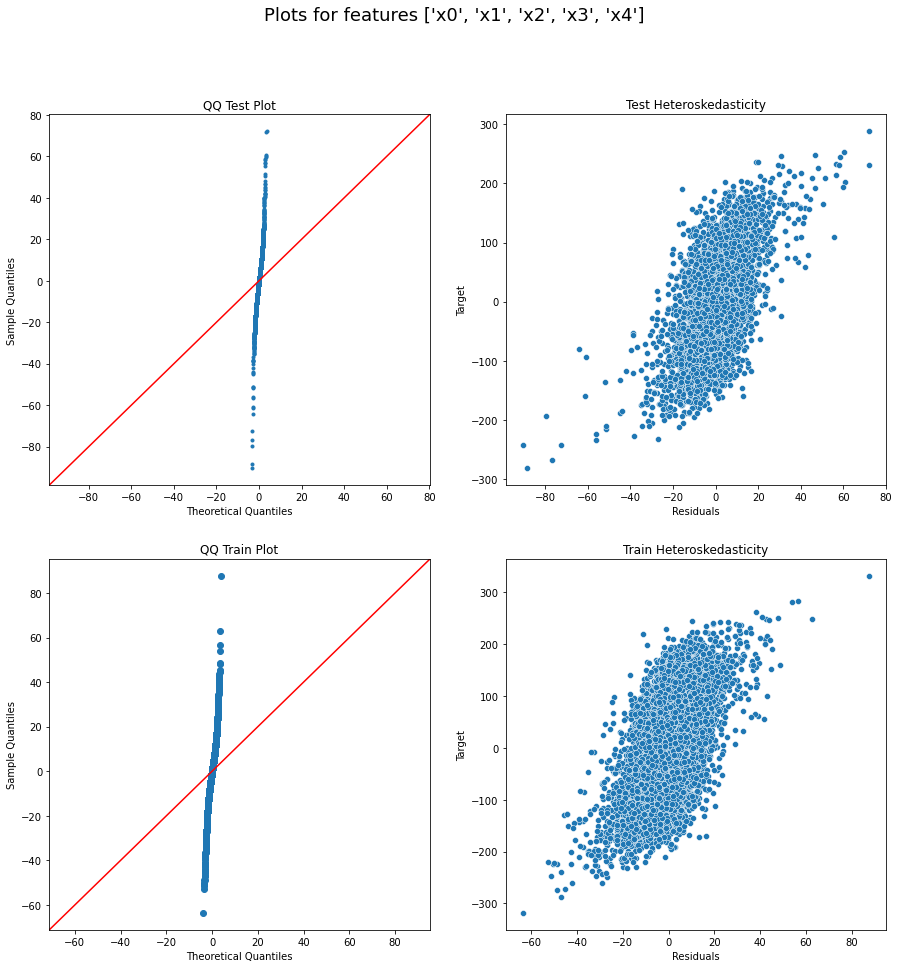

In [18]:
# Step through the features

feature_list = list(highest_knn_r2.loc[:,'features'])

for features in feature_list:
    
    knn.fit(X_train[features], y_train)
   
    plot_residuals(X_train, X_test, y_train, y_test, features, knn)